# <center>Ejercicios bonificacion final</center>

## Librerías
Para ambos ejercicios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools, algorithms

import warnings
warnings.filterwarnings('ignore')

## Stats

In [12]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Promedio', np.mean)
stats.register('Desviación Estándar', np.std)
stats.register('Mínimo', np.min)
stats.register('Máximo', np.max)

## 1.
Una empresa dispone de un capital de inversión de **USD 1.000.000** para el próximo año, durante el proceso de planeación se han identificado un conjunto de 10 proyectos que tiene diferentes características, se ha pedido que se estime el costo de proyecto, el retorno esperado del proyecto y el riesgo que asume la organización ante la posibilidad que el proyecto no sea desarrollado. Se identificó la siguiente información:

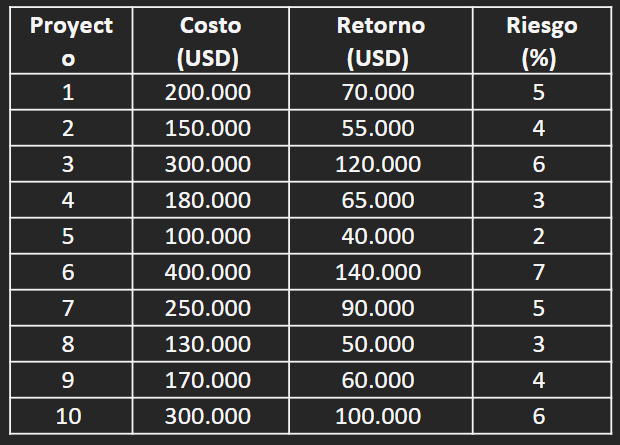

Si se quiere construir un portafolio óptimo de proyecto que *maximice el retorno de la inversión y minimice el riesgo promedio ponderado*, obtenga la combinación de proyectos que deben ponerse en marcha para lograr el proceso de optimización.

### Data

In [3]:
data = pd.read_csv('tabla1.csv')
data

,Proyecto,Costo (USD),Retorno (USD),Riesgo (%)
0,1,200000,70000,5
1,2,150000,55000,4
2,3,300000,120000,6
3,4,180000,65000,3
4,5,100000,40000,2
5,6,400000,140000,7
6,7,250000,90000,5
7,8,130000,50000,3
8,9,170000,60000,4
9,10,300000,10000,6


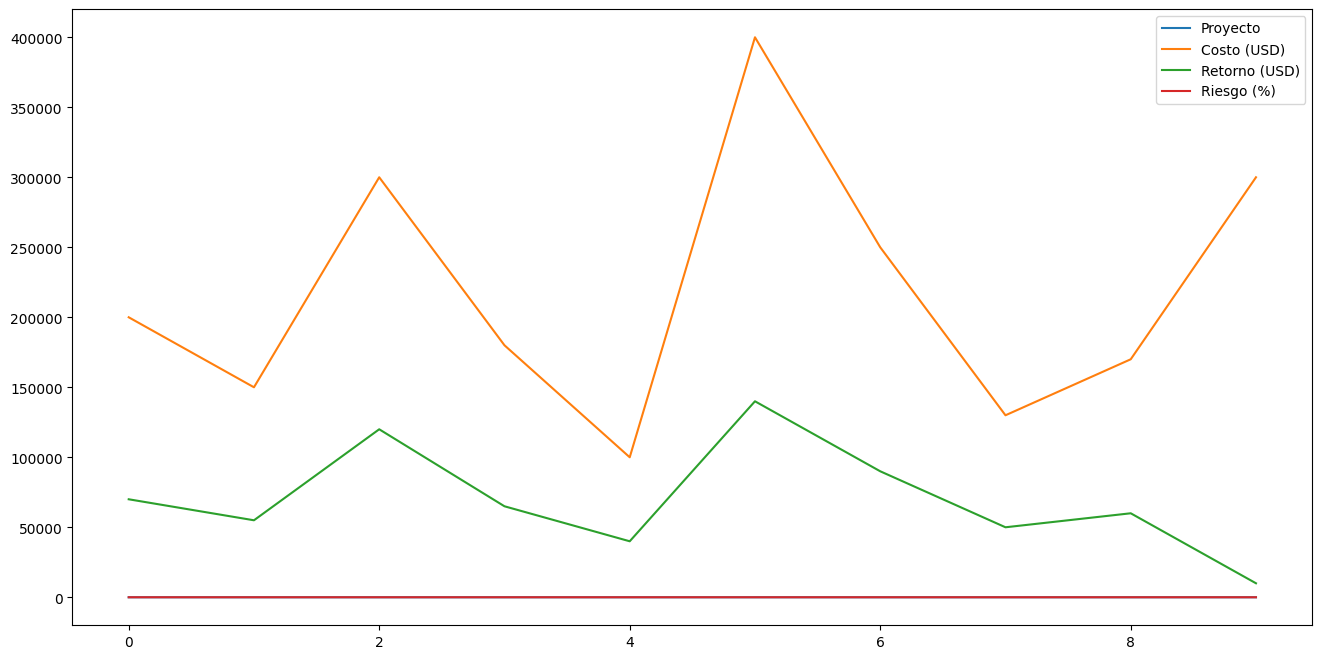

In [4]:
data.plot(figsize = (16, 8))
plt.show()

### Implementación del algoritmo

PRESUPUESTO: $1.000.000 USD

In [17]:
presupuesto = 1_000_000

#### Función de adaptabilidad

In [18]:
def evaluar_portafolio(individuo):
  costo_total = sum(individuo[i] * data['Costo (USD)'][i] for i in range(len(individuo)))
  retorno_total = sum(individuo[i] * data['Retorno (USD)'][i] for i in range(len(individuo)))
  riesgo_ponderado = (
    sum(individuo[i] * data['Riesgo (%)'][i] for i in range(len(individuo))) /
    sum(individuo) if sum(individuo) > 0 else 0
  )

  # Penalizar si el costo total excede el presupuesto
  if costo_total > presupuesto:
    return -1, float('inf')

  return retorno_total, riesgo_ponderado

#### Componentes genéticos

In [19]:
# Declarar la caja de herramientas
toolbox = base.Toolbox()

# Declarar las clases función de adaptabilidad e individuo
creator.create('FitnessMulti', base.Fitness, weights = (1.0, -1.0))
creator.create('Individual', list, fitness = creator.FitnessMulti)

# Declarar el gen, el individuo y la población
toolbox.register('attribute', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n=len(data['Proyecto']))
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# Declarar los operadores genéticos
toolbox.register('evaluate', evaluar_portafolio)
toolbox.register('select', tools.selNSGA2)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.1)

In [53]:
population = toolbox.population(n = 400)

# Parámetros del algoritmo
ngen = 200    # Número de generaciones
cxpb = 0.8    # Probabilidad de cruce
mutpb = 0.2   # Probabilidad de mutación

population, logbook = algorithms.eaMuPlusLambda(
  population, toolbox, mu=50, lambda_=100, cxpb=cxpb, mutpb=mutpb, ngen=ngen,
  stats=stats, verbose=True
)

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	400   	inf     	nan                	-1    	inf   
1  	100   	142952  	155462             	2.5   	375000
2  	100   	142202  	153068             	2.5   	375000
3  	100   	127202  	144514             	2.5   	375000
4  	100   	113302  	135151             	2.5   	375000
5  	100   	84001.4 	110557             	2.5   	375000
6  	100   	88751.4 	117898             	2     	375000
7  	100   	99551.5 	130577             	2     	375000
8  	100   	109702  	141478             	2     	375000
9  	100   	142852  	167956             	2     	375000
10 	100   	163702  	176556             	2     	375000
11 	100   	163702  	176556             	2     	375000
12 	100   	163702  	176556             	2     	375000
13 	100   	163702  	176556             	2     	375000
14 	100   	163702  	176556             	2     	375000
15 	100   	163702  	176556             	2     	375000
16 	100   	163702  	176556             	2     	375000
17 	100   	163702  	176556  

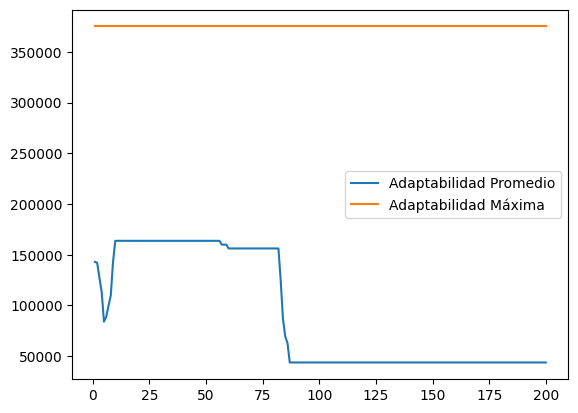

El individuo que maximice el retorno de la inversión y minimice el riesgo promedio ponderado es: [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]
La adaptabilidad del mejor individuo es: (np.int64(375000), np.float64(4.0))


In [54]:
# Graficar los resultados
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()

# Mostrar el mejor individuo
print(f'El individuo que maximice el retorno de la inversión y minimice el riesgo promedio ponderado es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_portafolio(tools.selBest(population, 1)[0])}')

### Conclusión

El individuo que maximice el retorno de la inversión y minimice el riesgo promedio ponderado es: **[0, 0, 1, 1, 1, 0, 1, 0, 1, 0]**

La adaptabilidad del mejor individuo es: **(np.int64(375000), np.float64(4.0))**

## 2.
Una empresa exportadora recibe ingresos en dólares, para protegerse de la volatilidad de la tasa de cambio puede utilizar diferentes instrumentos financieros derivados, teniendo en cuenta que la exposición original al riesgo es de USD 100.000 y con la información de los siguientes instrumentos:

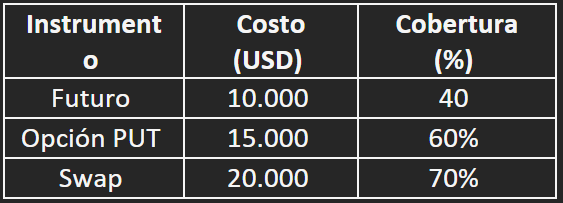

Elija la combinación de instrumentos que minimice tanto el riesgo residual como el costo total de la cobertura.

### Data

In [27]:
data = pd.read_csv('tabla2.csv')
data

,Instrumento,Costo (USD),Cobertura (%)
0,Futuro,10000,40
1,Opcion PUT,15000,60
2,Swap,20000,70


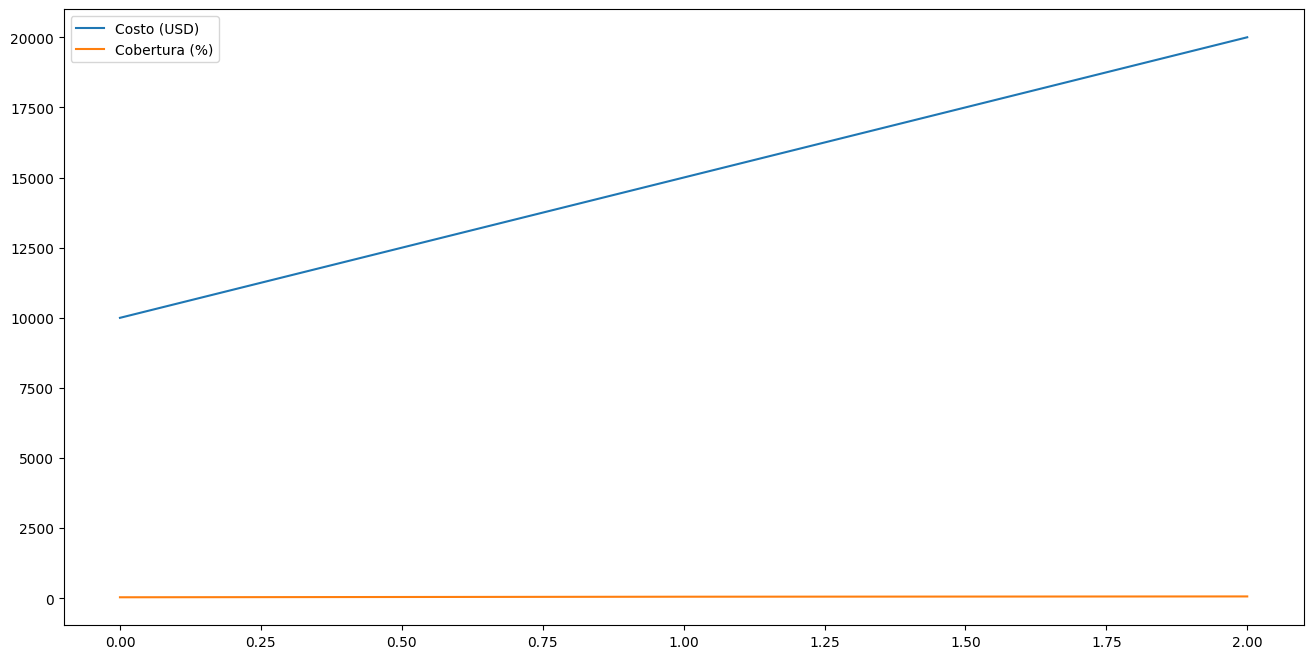

In [6]:
data.plot(figsize = (16, 8))
plt.show()

### Implementación del algoritmo

EXPOSICION ORIGINAL: $100.000 USD

In [28]:
exposicion_original = 100_000

#### Función de adaptabilidad

In [95]:
def evaluar_individuo(individuo):
  costo_total = np.dot(individuo, data['Costo (USD)'])
  cobertura_total = np.dot(individuo, data['Cobertura (%)'])

  riesgo_residual = max(exposicion_original * (1 - cobertura_total / 100), 0)
  penalizacion = exposicion_original if riesgo_residual > 0 else 0

  return (-costo_total - penalizacion, -riesgo_residual)

#### Componentes genéticos

In [91]:
# Declarar la caja de herramientas
toolbox = base.Toolbox()

# Declarar las clases función de adaptabilidad e individuo
creator.create('FitnessMulti', base.Fitness, weights = (1.0, -1.0))
creator.create('Individual', list, fitness = creator.FitnessMulti)

# Declarar el gen, el individuo y la población
toolbox.register('attribute', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n=len(data['Instrumento']))
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# Declarar los operadores genéticos
toolbox.register('evaluate', evaluar_individuo)
toolbox.register('select', tools.selNSGA2)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.1)

In [92]:
population = toolbox.population(n = 400)

# Parámetros del algoritmo
ngen = 200    # Número de generaciones
cxpb = 0.8    # Probabilidad de cruce
mutpb = 0.2   # Probabilidad de mutación

population, logbook = algorithms.eaMuPlusLambda(
  population, toolbox, mu=50, lambda_=100, cxpb=cxpb, mutpb=mutpb, ngen=ngen,
  stats=stats, verbose=True
)

gen	nevals	Promedio	Desviación Estándar	Mínimo 	Máximo
0  	400   	-51612.5	43261.8            	-120000	0     
1  	100   	-96500  	17327.7            	-100000	-0    
2  	100   	-96500  	17327.7            	-100000	-0    
3  	100   	-96500  	17327.7            	-100000	-0    
4  	100   	-96500  	17327.7            	-100000	-0    
5  	100   	-96500  	17327.7            	-100000	-0    
6  	100   	-96500  	17327.7            	-100000	-0    
7  	100   	-96500  	17327.7            	-100000	-0    
8  	100   	-96500  	17327.7            	-100000	-0    
9  	100   	-96500  	17327.7            	-100000	-0    
10 	100   	-96500  	17327.7            	-100000	-0    
11 	100   	-96500  	17327.7            	-100000	-0    
12 	100   	-96500  	17327.7            	-100000	-0    
13 	100   	-96500  	17327.7            	-100000	-0    
14 	100   	-96500  	17327.7            	-100000	-0    
15 	100   	-96500  	17327.7            	-100000	-0    
16 	100   	-96500  	17327.7            	-100000	-0    
17 	100   

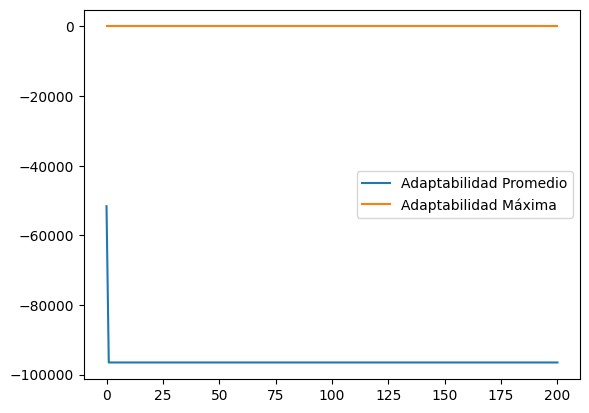

El individuo que minimice tanto el riesgo residual como el costo total de la cobertura es: [1, 1, 0]
La adaptabilidad del mejor individuo es: (np.int64(-25000), np.float64(-0.0))


In [94]:
# Graficar los resultados
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()

# Mostrar el mejor individuo
print(f'El individuo que minimice tanto el riesgo residual como el costo total de la cobertura es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_individuo(tools.selBest(population, 1)[0])}')

### Conclusión

El individuo que minimice tanto el riesgo residual como el costo total de la cobertura es: **[1, 1, 0]**

La adaptabilidad del mejor individuo es: **(np.int64(-25000), np.float64(-0.0))**